In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

# 이미지 생성 및 불러오기
1.   이미지 주소 불러오기
2.   이미지를 Byte형태로 변환하기
3.   Image를 생성한 것을 객체에 저장하기



<class 'PIL.JpegImagePlugin.JpegImageFile'>


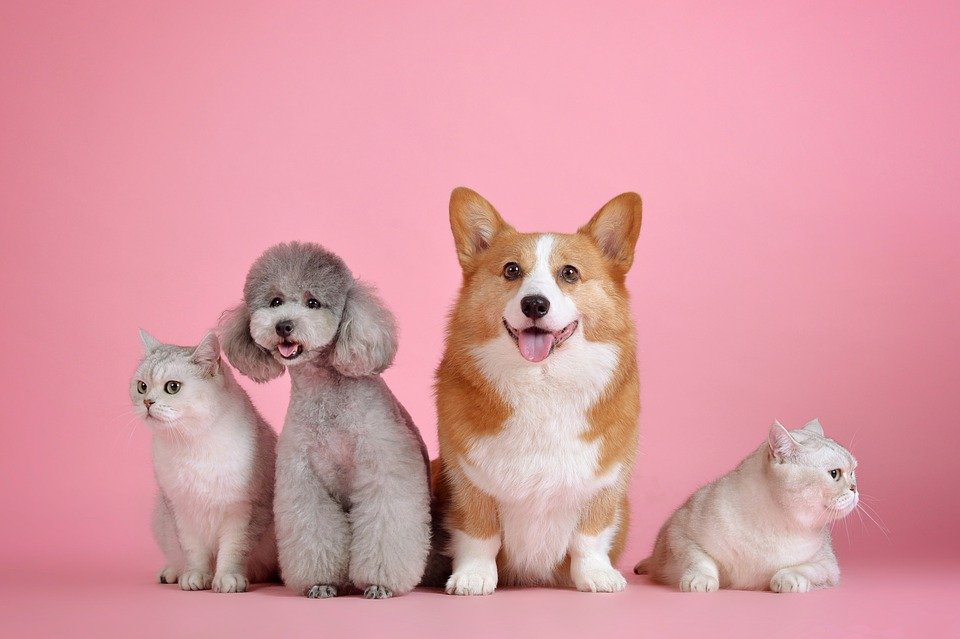

In [4]:
url = 'https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'
response = requests.get(url)
pic = Image.open(BytesIO(response.content))
print(type(pic))
pic

# PIL이미지를 array 형변환
1. 흑백인 이미지는 2차원으로 표현 가능하지만, 컬러 이미지는 3차원 색상으로 이미지가 표현된다.

In [5]:
pic_arr = np.asarray(pic)

In [7]:
print(type(pic_arr))
print(pic_arr.shape)

<class 'numpy.ndarray'>
(639, 960, 3)


## Matplotlib을 활용하여 이미지 출력하기
1. 채널 순서 (R G B : 0 1 2)

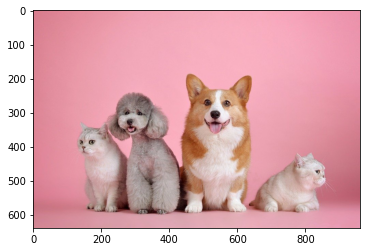

In [8]:
# array형태인 Image 출력하기
plt.imshow(pic_arr)
plt.show()

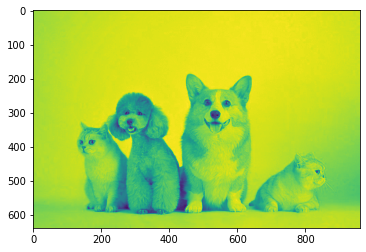

In [9]:
pic_copy = pic_arr.copy()
plt.imshow(pic_copy[:,:, 0])
plt.show()

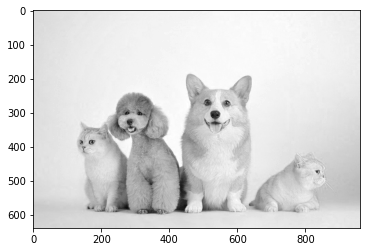

In [10]:
plt.imshow(pic_copy[:,:, 0], cmap = 'gray')
plt.show()

In [12]:
print(pic_copy[:5, :5, 0])  # R
print(pic_copy[:5, :5, 1])  # G
print(pic_copy[:5, :5, 2])  # B

[[215 215 215 215 215]
 [215 215 215 215 215]
 [215 215 215 215 215]
 [216 216 216 216 216]
 [216 216 216 216 216]]
[[124 124 124 124 124]
 [124 124 124 124 124]
 [124 124 124 124 124]
 [125 125 125 125 125]
 [125 125 125 125 125]]
[[141 141 141 141 141]
 [141 141 141 141 141]
 [141 141 141 141 141]
 [142 142 142 142 142]
 [142 142 142 142 142]]


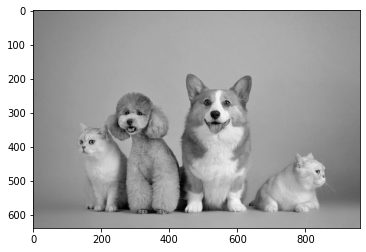

In [13]:
plt.imshow(pic_copy[:,:, 1], cmap = 'gray')
plt.show()

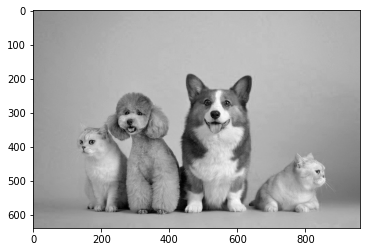

In [14]:
plt.imshow(pic_copy[:,:, 2], cmap = 'gray')
plt.show()

# RGB 색상으로만 변환하기

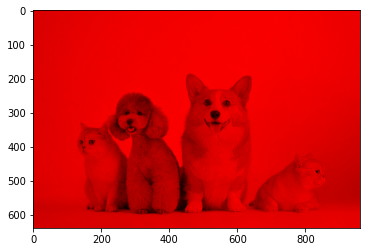

In [15]:
pic_red = pic_arr.copy()
pic_red[:, :, 1] = 0
pic_red[:, :, 2] = 0
plt.imshow(pic_red)
plt.show()

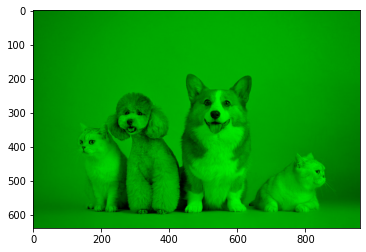

In [16]:
pic_green = pic_arr.copy()
pic_green[:, :, 0] = 0
pic_green[:, :, 2] = 0
plt.imshow(pic_green)
plt.show()

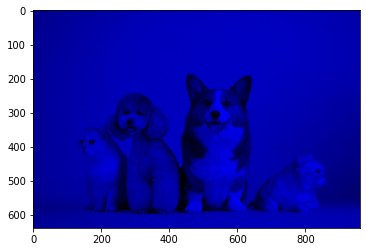

In [17]:
pic_blue = pic_arr.copy()
pic_blue[:, :, 0] = 0
pic_blue[:, :, 1] = 0
plt.imshow(pic_blue)
plt.show()

# OpenCV를 통하여 Image 출력하기

1. from google.colab.patches import cv2_imshow
  - (일반 컴퓨터)cv2.imshow

#### OpenCV는 그림을 RGB형태로 그림을 읽지만, cv2_imshow는 BGR순으로 색상을 읽습니다.
- 배열의 순서를 [: , : , : : -1]을 통하여 변환할 수 있습니다.

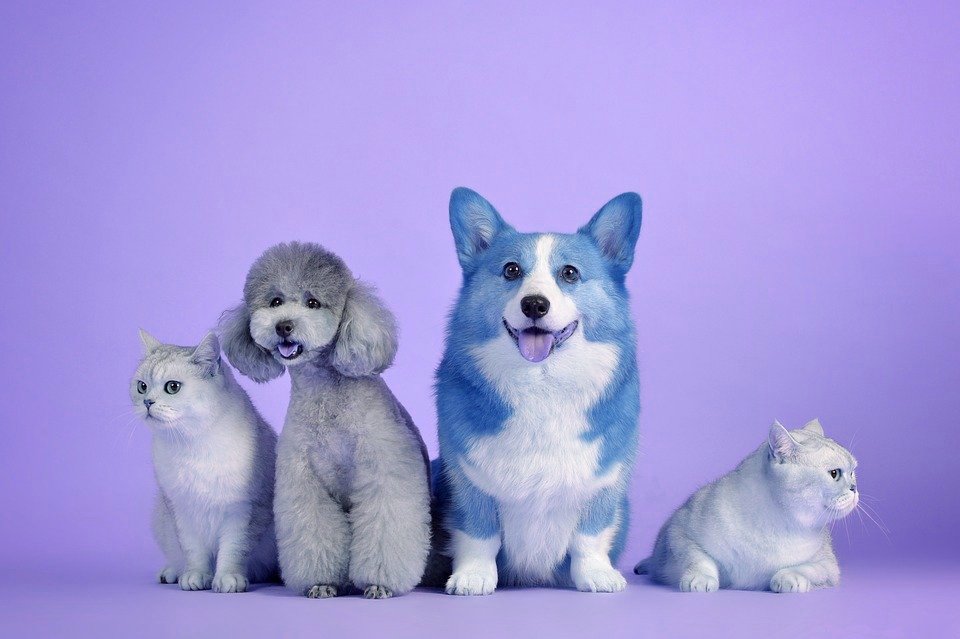

In [18]:
from google.colab.patches import cv2_imshow
cv2_imshow(pic_arr)

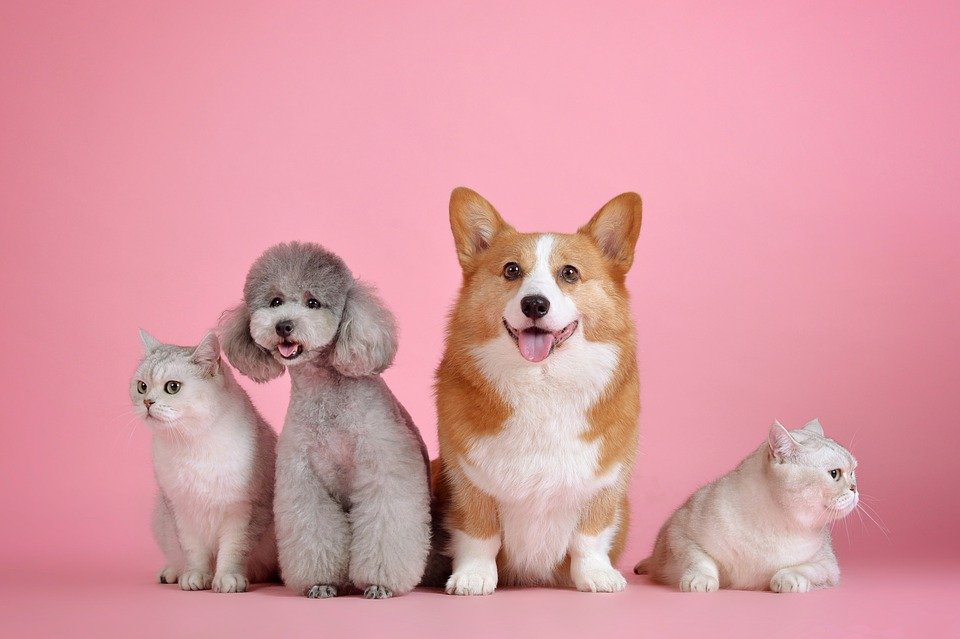

In [19]:
# 그러므로, cv2_imshow로 이미지 파일을 읽는데, BGR로 읽는 것을 RGB로 변환해야 한다.
image = cv2.cvtColor(pic_arr, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

# OpenCV를 통하여 도형 그리기

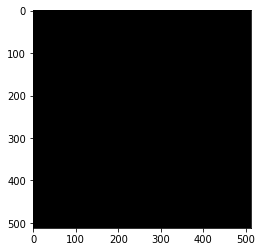

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = np.zeros((512, 512, 3), np.uint8)

plt.imshow(img)
plt.show()

# 직선(Line)

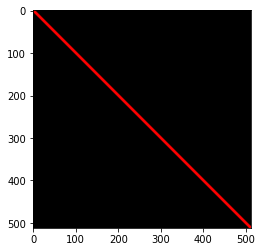

In [22]:
img = cv2.line(img, (0,0), (511, 511), (255, 0, 0), 5)
# 이미지 파일, 시작점, 끝점, 색상, 굵기
plt.imshow(img)
plt.show()

# 사각형(Rectangle) 그리기

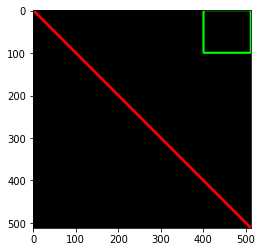

In [23]:
img = cv2.rectangle(img, (400, 0), (511, 100), (0, 255, 0), 3)
# 이미지 파일, 시작점, 끝점, 색상
plt.imshow(img)
plt.show()

# 원(Circle) 그리기

In [24]:
img = cv2.circle(img, (50, 450), 50, (0, 255, 255), 5)
# 이미지, 원의 중심, 반지름, 색상, 선두께, 만약 선 두께가 -1이면 안쪽을 전부 채웁니다.

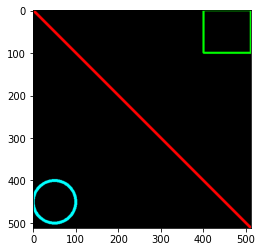

In [25]:
plt.imshow(img)
plt.show()

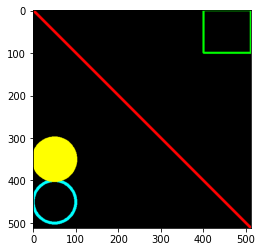

In [27]:
img = cv2.circle(img, (50, 350), 50, (255, 255, 0), -1)
plt.imshow(img)
plt.show()

# 타원(Elipse) 그리기

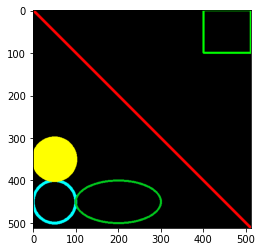

In [32]:
img = cv2.ellipse(img, (200, 450,),(100, 50), 0, 0, 360, (2, 200, 30), 3)
# 이미지, 원의 중심, 중심으로부터의 거리, 기울기 각, 시작각도 ,끝각도, 만약 선 두께가 -1이면 안쪽을 전부 채웁니다.
plt.imshow(img)
plt.show()

# 다각형(Polygon) 그리기

In [33]:
pts = np.array([[0, 0], [0, 10], [10, 10], [10, 0]], np.int32)
print(pts.shape)
pts = pts.reshape(-1, 2, 1)
print(pts.shape)

(4, 2)
(4, 2, 1)


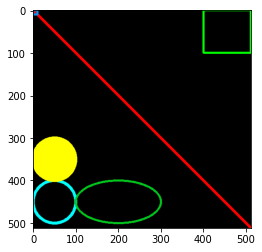

In [34]:
img = cv2.polylines(img, [pts], True , (0, 150, 250), 4)
plt.imshow(img)
plt.show()

# 텍스트(Text) 그리기

|파라미터|설명|
|--------|----|
|`img`|image|
|`text`|표시할 문자열|
|`org`|문자열이 표시될 위치. 문자열의 **bottom-left corner 점**|
|`fontFace`|폰트 타입. `CV2.FONT_XXX`|
|`fontScale`|폰트 크기|
|`color`|폰트 색상|
|`thichness`|글자의 굵기|
|`lineType`|글자 선의 형태|
|`bottomLeftOrigin`|영상의 원점 좌표 설정(True: 좌하단, False: 좌상단)|

- 문자열 폰트 옵션

|옵션|값|설명|
|----|--|----|
|`cv2.FONT_HERSHEY_SIMPLEX`|0|중간 크기 산세리프 폰트|
|`cv2.FONT_HERSHEY_PLAIN`|1|작은 크기 산세리프 폰트|
|`cv2.FONT_HERSHEY_DUPLEX`|2|2줄 산세리프 폰트|
|`cv2.FONT_HERSHEY_COMPLEX`|3|중간 크기 세리프 폰트|
|`cv2.FONT_HERSHEY_TRIPLEX`|4|3줄 세리프 폰트|
|`cv2.FONT_HERSHEY_COMPLEX_SMALL`|5|COMPLEX 보다 작은 크기|
|`cv2.FONT_HERSHEY_SCRIPT_SIMPLEX`|6|필기체 스타일 폰트|
|`cv2.FONT_HERSHEY_SCRIPT_COMPLEX`|7|복잡한 필기체 스타일|
|`cv2.FONT_ITALIC`|16|이탤릭체를 위한 플래그|

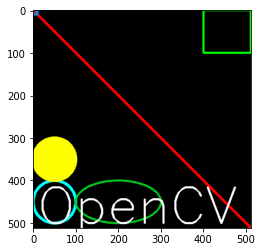

In [36]:
img = cv2.putText(img, 'OpenCV', (10, 500), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 3)
plt.imshow(img)
plt.show()